# Problem 1 (5% credit).
Which of the techniques among logistic regression and k-means clustering are unsupervised learning (select all that applied): a) both; b) k-means clustering, but not the logistic regression; c) logistic regression, but not the k-mean clustering; d) none of them - both are supervised.


Solution : B. The K-means clustering is unsupervised since we do not have any training data set for it.

# Problem 2 (5% credit).
What is the average silhouette measure used for in the k-means clustering (select all that applies): a) determining the percentage of correct cluster definitions over the validation set; b) select the most natural number of clusters for the dataset; c) determining average size of the clusters; d) estimating how more similar on average the elements are to their own clusters vs the most similar neighbor clusters; e) quantifying how distinctive the clusters are.

Solution . D. for each data point xi, it quantifies relative attachement strength to its current cluster vs the closest neighbor cluster

# Problem 3 (10% credit).
What of the below (select all that apply) is true for the binary classification confusion matrix report: a) it reports sizes of each cluster and number of the clusters; b) it is a square matrix; c) it is symmetrical; d) it has dimensions 2x2; e) it has dimensions 3x3; f) it reports the quality of classification fit over the test set; g) it reports the percentage of correctly classified datapoints over the test set; h) it reports the percentage of incorrectly classified datapoints over the test set;

Solutions:  f,g,h. 

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import scipy
from scipy import stats
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Populating the interactive namespace from numpy and matplotlib


In [2]:
yt=[1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
yc=[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

# Problem 4 (15% credit)
For the above binary classification (yc - classified values, yt - true ones) compute and visualize the confusion matrix as well as precision, recall and accuracy

In [3]:
TP=0
FP=0
FN=0
TN=0
for i in range(len(yt)):
    if ((yt[i]==1)&(yc[i]==1)):
        TP+=1
    if ((yt[i]==1)&(yc[i]==0)):
        FP+=1
    if ((yt[i]==0)&(yc[i]==1)):
        FN+=1
    if ((yt[i]==0)&(yc[i]==0)):
        TN+=1    
#compute precision, accuracy and recall
ACC=100.0*(TP+TN)/(TP+TN+FP+FN)
Recall=100.0*TP/(TP+FN)
Prec=100.0*TP/(TP+FP)
print('The solution is  Precision={0}, Accuracy={1}, Recall={2}'.format(Prec,ACC,Recall))

The solution is  Precision=66.6666666667, Accuracy=70.0, Recall=80.0



# Problem 5a (15% credit).
For the data above define the clustering into 3 clusters using the best outcome of k-means, being run 100 times

In [4]:
data = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/lab5/H51.csv' , index_col=0 )

In [5]:
data.columns

Index([u'x1', u'x2'], dtype='object')

In [6]:
xc=data.x1
yc=data.x2

In [7]:
random.seed(2015)
label0=stats.binom.rvs(p = 0.5, n=3, size = 100)
x=xc[np.array(label0)]+stats.norm.rvs(0, 1, size = 100)
y=yc[np.array(label0)]+stats.norm.rvs(0, 1, size = 100)
X=np.append(x,y).reshape(2,100).transpose()

In [8]:
est=KMeans(n_clusters=3,n_init=100)   ## init is iteration here , intializing the model 
est.fit(X) 
labels=est.labels_

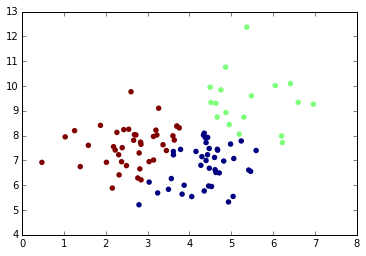

In [9]:
plt.figure(figsize=(6,4))
plt.scatter (x,y,s=30,c=labels.astype(np.float),lw=0)

# Problem 5b (20% credit).
For the data above perfrom k-means clustering for k=2..10, compute and visualize the average Silhouette score, select and visualize the clustering for that k, which maximizes average Silhouette score

2 clusters: 0.341696302482
3 clusters: 0.386687255873
4 clusters: 0.376911585732
5 clusters: 0.361088850157
6 clusters: 0.340809871891
7 clusters: 0.332832989063
8 clusters: 0.350384794807
9 clusters: 0.357659578815
10 clusters: 0.354695557937
11 clusters: 0.352145501465
 The solution is : Best for 3 clusters: 0.386687255873


/Users/bhagwatsinghbisht/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


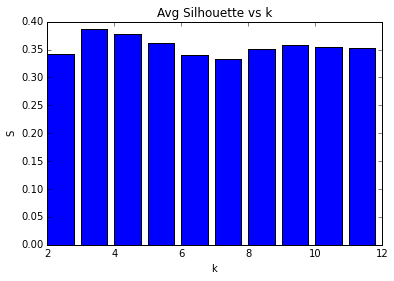

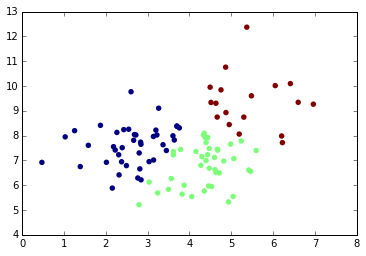

In [10]:
s=[0]*10
for k in range(0,10):
    est=KMeans(n_clusters=k+2,n_init=25)
    est.fit(X)
    s[k]=silhouette_score(X, est.labels_)
    print('{0} clusters: {1}'.format(k+2,s[k]))
k=np.argmax(s)    
est=KMeans(n_clusters=k+2,n_init=100)
est.fit(X)
labels=est.labels_
plt.figure()
plt.bar(range(2,12),s)
plt.xlabel('k')
plt.ylabel('S')
plt.title('Avg Silhouette vs k')
print(' The solution is : Best for {0} clusters: {1}'.format(k+2,silhouette_score(X, labels)))
plt.figure()
plt.scatter (x,y,s=30,c=labels.astype(np.float),lw=0)

# Problem 6a (15% credit)
For the second dataset above train the logistic regression over the provided training set, report the summary with coeffieints, fit and statistics.


In [17]:
data2training = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/lab5/H52train.csv' , index_col=0 )
data2test = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/lab5/H52test.csv' , index_col=0 )

In [18]:
random.seed(2015)
logit = smf.logit('y ~ x1 + x2', data = data2training).fit()  ### training the model on the training data set 
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.200402
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 20 Oct 2015   Pseudo R-squ.:                  0.6982
Time:                        23:00:32   Log-Likelihood:                -20.040
converged:                       True   LL-Null:                       -66.406
                                        LLR p-value:                 7.301e-21
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5540      0.924     -0.600      0.549        -2.364     1.256
x1             0.7219      0.

In [19]:
pre = logit.predict(data2test)>0.5


# Problem 6b (15% credit).
For the second dataset and logistic regression above define the true and false positives/negatives over the validation set and visualize the classification through logit vs the true one.

In [20]:

#compute TP,FP,FN,TN for the above classification
TP=sum((pre==1)&(data2test.y==1))
FP=sum((pre==1)&(data2test.y==0))
FN=sum((pre==0)&(data2test.y==1))
TN=sum((pre==0)&(data2test.y==0))

#compute precision, accuracy and recall
ACC=100.0*(TP+TN)/(TP+TN+FP+FN)
Recall=100.0*TP/(TP+FN)
Prec=100.0*TP/(TP+FP)
print('The solution is : Precision={0}, Accuracy={1}, Recall={2}'.format(Prec,ACC,Recall))

The solution is : Precision=97.7777777778, Accuracy=91.0, Recall=84.6153846154
